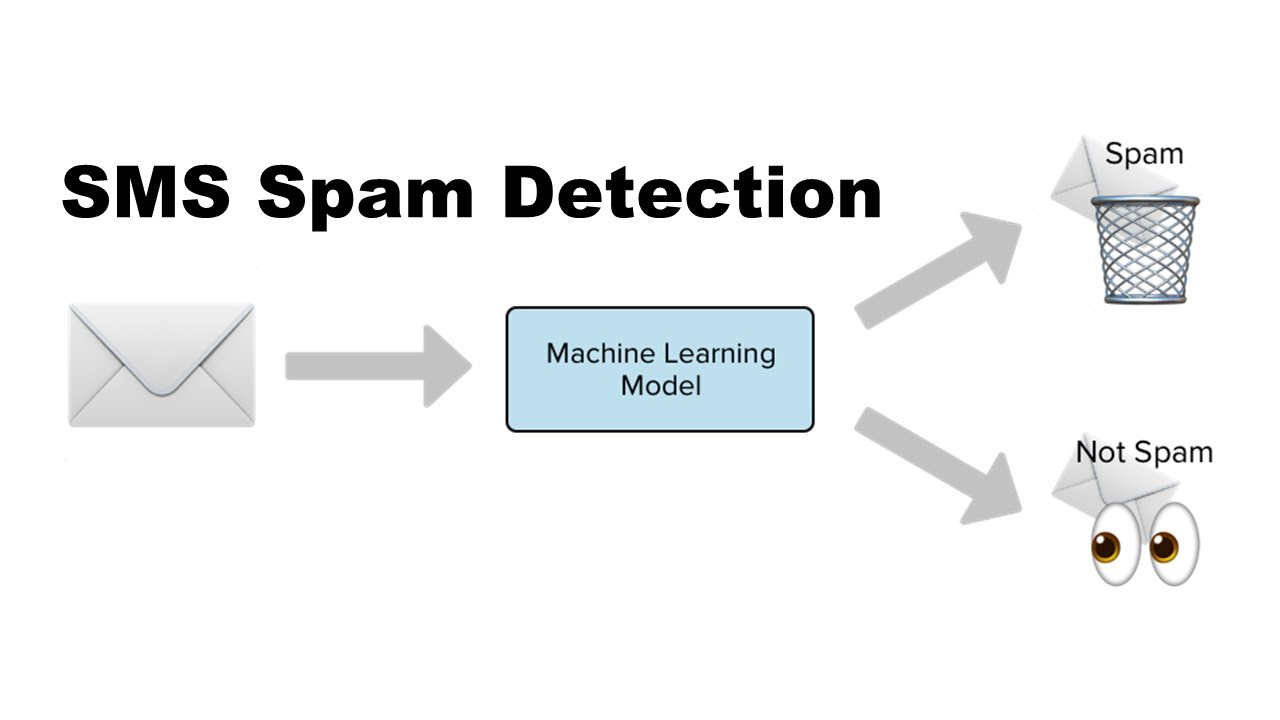

In [1]:
from IPython.display import Image
Image(filename = 'sms.jpg')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("C:\\Users\\Mubasshira\\Downloads\\spam.csv", encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.isnull().sum()
#missing values

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
data.shape

(5572, 5)

In [11]:
selected_columns = ['v1', 'v2']
data = data[selected_columns]

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data.columns = ['Category', 'Message']

In [18]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


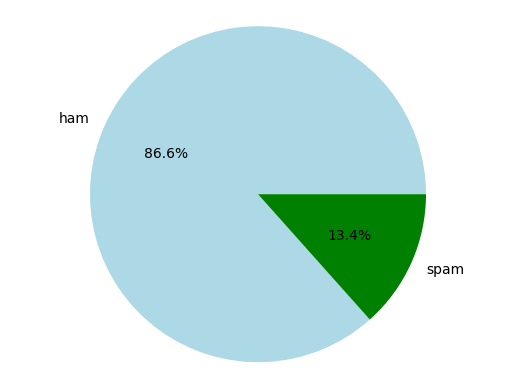

In [19]:
category_counts = data['Category'].value_counts()
labels = category_counts.index
sizes = category_counts.values
colors = ['lightblue', 'green']
plt.pie(sizes, data = data, autopct = '%1.1f%%', labels = labels,colors = colors)
plt.axis('equal')
plt.show()

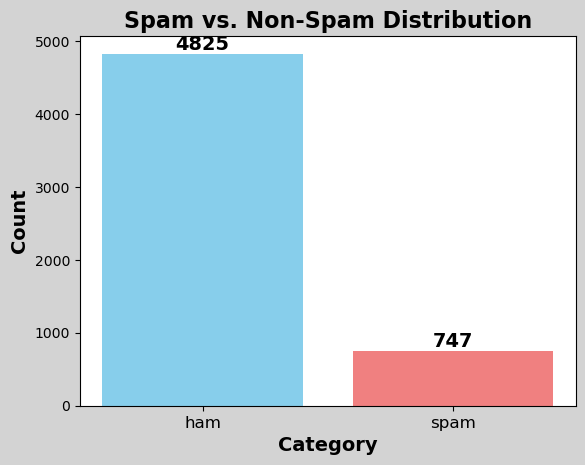

In [20]:
colors = ['skyblue', 'lightcoral']
plt.figure(facecolor='lightgray')

plt.bar(labels, sizes, color=colors)
for label, size in zip(labels, sizes):
    plt.text(label, size, str(size), ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.title('Spam vs. Non-Spam Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.show()

In [21]:
data["label"]=data["Category"].replace({"ham":0,"spam":1})
data.head(10)

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already installed
nltk.download('stopwords')
nltk.download('wordnet')

# Load stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mubasshira\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mubasshira\AppData\Roaming\nltk_data...


In [24]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [25]:
data['Message'] = data['Message'].apply(remove_stopwords)
data['Message'] = data['Message'].apply(lemmatize_text)

In [26]:
data['Message'].value_counts()

Message
Sorry, I'll call later                                                                                                                          30
cant pick phone right now. Pls send message                                                                                                     12
Ok...                                                                                                                                           10
Please call customer service representative FREEPHONE 0808 145 4742 9am-11pm guaranteed å£1000 cash å£5000 prize!                                4
Ok.                                                                                                                                              4
                                                                                                                                                ..
Ok knackered. came home went sleep! good full time work lark.                                                 

In [27]:
from sklearn.model_selection import train_test_split

X = data['Message']  # Feature (text data)
y = data['label']  # Target (label encoding)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.74      0.84       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [31]:
new_messages = ["Your prize is waiting. Claim it now!", "I'll call you later."]
new_messages_tfidf = tfidf_vectorizer.transform(new_messages)
predictions = model.predict(new_messages_tfidf)
print(predictions)

[0 0]


- Model has Predicted both "ham" (label 0) for the new messages "Your prize is waiting. Claim it now!" and "I'll call you later," even after achieving good accuracies. T
- There might be an issue with the model's performance. 
- Let's Check

In [32]:
from sklearn.utils import resample
ham_samples = data[data['label'] == 0]
spam_samples = data[data['label'] == 1]

In [33]:
ham_samples

,Category,Message,label
0,ham,"Go jurong point, crazy.. Available bugis n gre...",0
1,ham,Ok lar... Joking wif u oni...,0
3,ham,U dun say early hor... U c already say...,0
4,ham,"Nah think go usf, life around though",0
6,ham,Even brother like speak me. treat like aid pat...,0
...,...,...,...
5565,ham,Huh lei...,0
5568,ham,Ì_ b going esplanade fr home?,0
5569,ham,"Pity, * mood that. So...any suggestions?",0
5570,ham,guy bitching acted like i'd interested buying ...,0


In [34]:
spam_samples

,Category,Message,label
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1
5,spam,FreeMsg Hey darling 3 week's word back! I'd li...,1
8,spam,WINNER!! valued network customer selected rece...,1
9,spam,mobile 11 month more? U R entitled Update late...,1
11,spam,"SIX chance win CASH! 100 20,000 pound txt> CSH...",1
...,...,...,...
5537,spam,Want explicit SEX 30 secs? Ring 02073162414 no...,1
5540,spam,ASKED 3MOBILE 0870 CHATLINES INCLU FREE MINS. ...,1
5547,spam,"contract mobile 11 Mnths? Latest Motorola, Nok...",1
5566,spam,REMINDER O2: get 2.50 pound free call credit d...,1


**It seems like we have a significantly imbalanced dataset with many more "ham" messages than "spam" messages, the model might tend to predict the majority class.**

**Balancing our dataset is crucial to ensure an equal distribution of data, which, in turn, contributes to more accurate and reliable predictions**

In [35]:
from sklearn.utils import resample
spam_upsampled = resample(spam_samples, replace=True, n_samples=len(ham_samples), random_state=42)
balanced_data = pd.concat([ham_samples, spam_upsampled])
balanced_data = balanced_data.sample(frac=1, random_state=42)

X_balanced = balanced_data['Message']
y_balanced = balanced_data['label']

In [36]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf_balanced = tfidf_vectorizer.fit_transform(X_train_balanced)
X_test_tfidf_balanced = tfidf_vectorizer.transform(X_test_balanced)

Naive Bayes (Multinomial Naive Bayes): Naive Bayes models, particularly the Multinomial Naive Bayes, are simple and effective for text classification tasks. They are well-suited for spam classification because they work well with text data and handle feature independence assumptions

**Optimizing hyperparameters and establishing a Multinomial Naive Bayes model are essential steps to enhance predictive performance.**

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter (Laplace smoothing)
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_tfidf_balanced, y_train_balanced)
best_alpha = grid_search.best_params_['alpha']
best_fit_prior = grid_search.best_params_['fit_prior']

print("Best hyperparameters:")
print(f"Best Alpha: {best_alpha}")
print(f"Best fit_prior: {best_fit_prior}")
best_nb_model = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
best_nb_model.fit(X_train_tfidf_balanced, y_train_balanced)
y_pred_nb = best_nb_model.predict(X_test_tfidf_balanced)

Best hyperparameters:
Best Alpha: 0.1
Best fit_prior: False


In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred_nb = best_nb_model.predict(X_test_tfidf_balanced)

classification_rep = classification_report(y_test_balanced, y_pred_nb)
accuracy = accuracy_score(y_test_balanced, y_pred_nb)
confusion_mat = confusion_matrix(y_test_balanced, y_pred_nb)

print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       955

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

Accuracy: 0.99
Confusion Matrix:
[[965  10]
 [  4 951]]


In [39]:
# List of 30 new messages for prediction
new_messages = [
    "Congratulations! You've won a free vacation!",
    "Important meeting at 10 AM tomorrow.",
    "URGENT: Claim your prize now!",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Get a 50% discount on our latest products.",
    "Meeting rescheduled to 3 PM.",
    "You have a package waiting for you at the post office.",
    "Lunch at 1 PM today. Don't be late!",
    "Last chance to claim your reward.",
    "Meeting with the team at 4 PM.",
    "Your package has been delivered to your doorstep.",
    "You've won a luxury vacation package!",
    "Meeting with the client at 3 PM.",
    "Exclusive discount for our loyal customers.",
    "Important conference call at 11 AM.",
    "Claim your prize now!",
    "Reminder: Parent-teacher meeting tomorrow.",
    "50% off on all products for a limited time.",
    "Your account has been locked. Verify your identity.",
    "Free trial of our premium service.",
    "Congratulations! You've won a gift card worth $100!",
    "Meeting at 2 PM in the conference room.",
    "URGENT: Claim your prize within 24 hours!",
    "Reminder: Don't forget your appointment tomorrow.",
    "Get 20% off on our latest collection!",
    "Lunch with the team at 12 PM today.",
    "Your package is out for delivery today.",
    "Free access to our premium content.",
    "Last chance to win a vacation.",
    "Team meeting canceled for today."
]

# Vectorize the new messages using the same TF-IDF vectorizer
new_messages_tfidf = tfidf_vectorizer.transform(new_messages)

predictions = best_nb_model.predict(new_messages_tfidf)

#Printing Predictions
for i, prediction in enumerate(predictions):
    message = new_messages[i]
    print(f"Message {i + 1}: {message}")
    if prediction == 1:
        print("Predicted Label: spam")
    else:
        print("Predicted Label: ham")
    print()

Message 1: Congratulations! You've won a free vacation!
Predicted Label: spam

Message 2: Important meeting at 10 AM tomorrow.
Predicted Label: ham

Message 3: URGENT: Claim your prize now!
Predicted Label: spam

Message 4: Reminder: Your appointment is scheduled for tomorrow.
Predicted Label: ham

Message 5: Get a 50% discount on our latest products.
Predicted Label: spam

Message 6: Meeting rescheduled to 3 PM.
Predicted Label: ham

Message 7: You have a package waiting for you at the post office.
Predicted Label: ham

Message 8: Lunch at 1 PM today. Don't be late!
Predicted Label: ham

Message 9: Last chance to claim your reward.
Predicted Label: spam

Message 10: Meeting with the team at 4 PM.
Predicted Label: ham

Message 11: Your package has been delivered to your doorstep.
Predicted Label: spam

Message 12: You've won a luxury vacation package!
Predicted Label: spam

Message 13: Meeting with the client at 3 PM.
Predicted Label: ham

Message 14: Exclusive discount for our loyal c

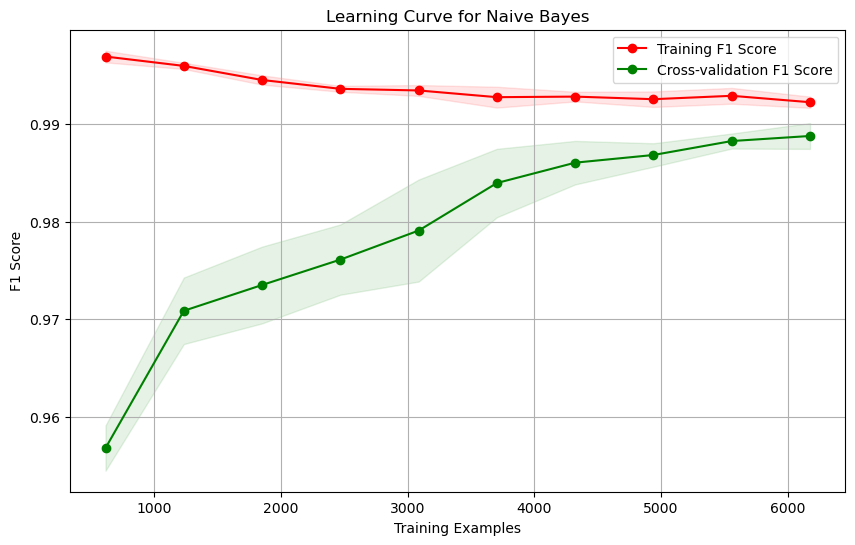

In [40]:
from sklearn.model_selection import learning_curve

best_nb_model = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
train_sizes = np.linspace(0.1, 1.0, 10) 

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_nb_model, X_train_tfidf_balanced, y_train_balanced,
    train_sizes=train_sizes, cv=5, scoring='f1', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Naive Bayes")
plt.xlabel("Training Examples")
plt.ylabel("F1 Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training F1 Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation F1 Score")

plt.legend(loc="best")
plt.show()

**The Naive Bayes model's ability to distinguish between "spam" and "ham" messages is evident in this context, and it may be the preferred choice for this particular dataset and task.**

In [41]:
print('Thankyou!')

Thankyou!
